In [1]:
%precision %g
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from math import sqrt, pi, sin, cos, exp
#from cmath import sqrt as csqrt
import numpy as np
from scipy import constants as C
import matplotlib.pyplot as plt

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')

# CP 3.1 Plotting experimental data

This problem looks at the monthly sunspot data since January 1979 which is identified as the 0th month in the data.

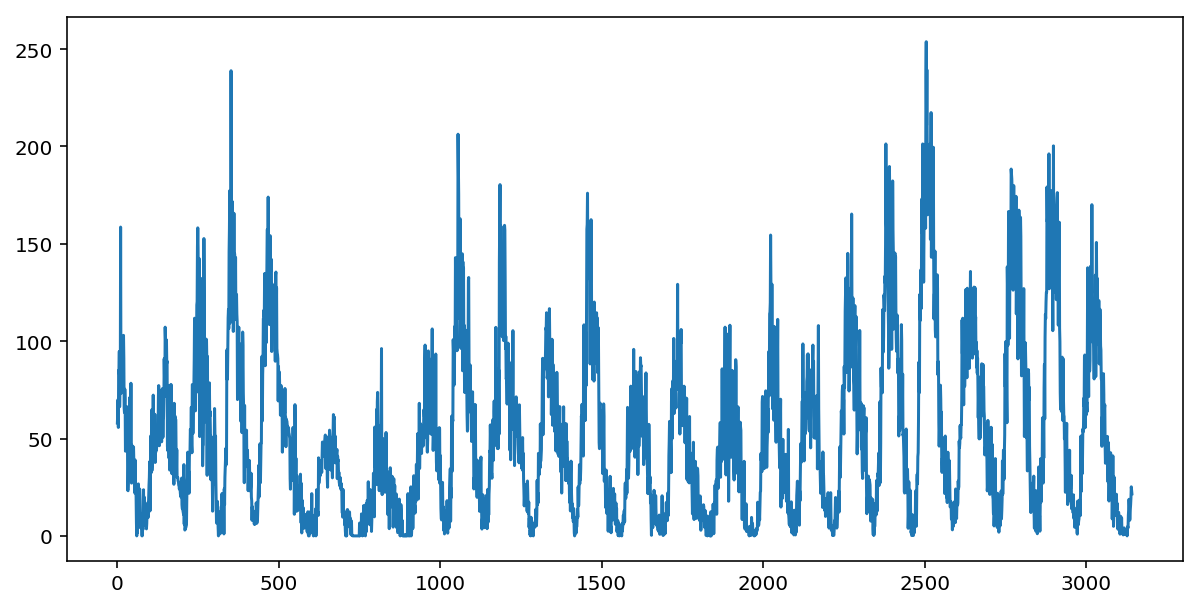

In [3]:
#this program creates a graph from a set of data

def graph_sunspots(file_name):
    sunspots = np.loadtxt(file_name, float)

    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    x = sunspots[:,0]
    y = sunspots[:,1]
    plt.plot(x,y)
    plt.show()
    
graph_sunspots("sunspots.txt")

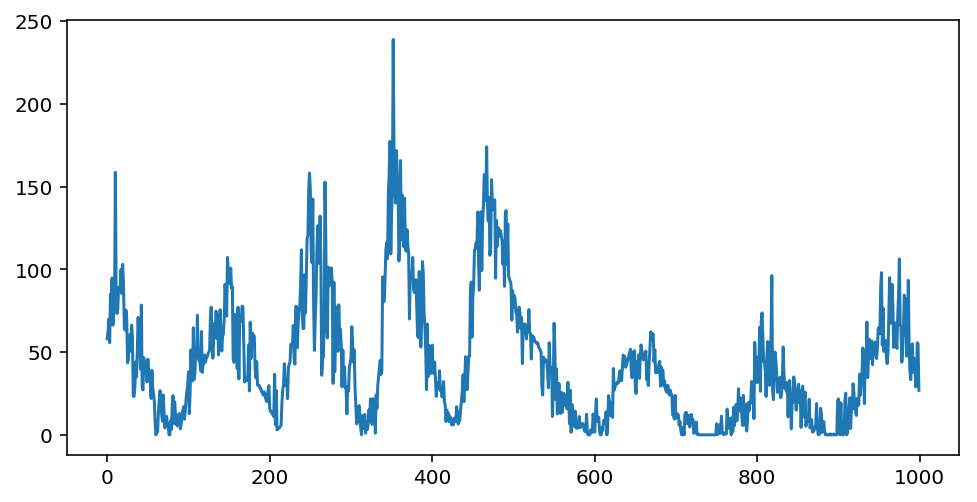

In [4]:
#this program is modified to only graph the first 1000 data points
def graph_sunspots(file_name):
    sunspots = np.loadtxt(file_name, float)

    fig, ax = plt.subplots(1, 1, figsize = (8, 4))
    x = []
    y = []
    for i in range(1000):
        x.append(sunspots[i,0]) 
        y.append(sunspots[i,1])
    plt.plot(x,y)
    plt.show() 
    
graph_sunspots("sunspots.txt")

A running average of the form $\, Y_k = {1\over2r} \sum_{m=-r}^r y_{k+m}\,$ can be overlaid on this plot of the first 1000 data points.

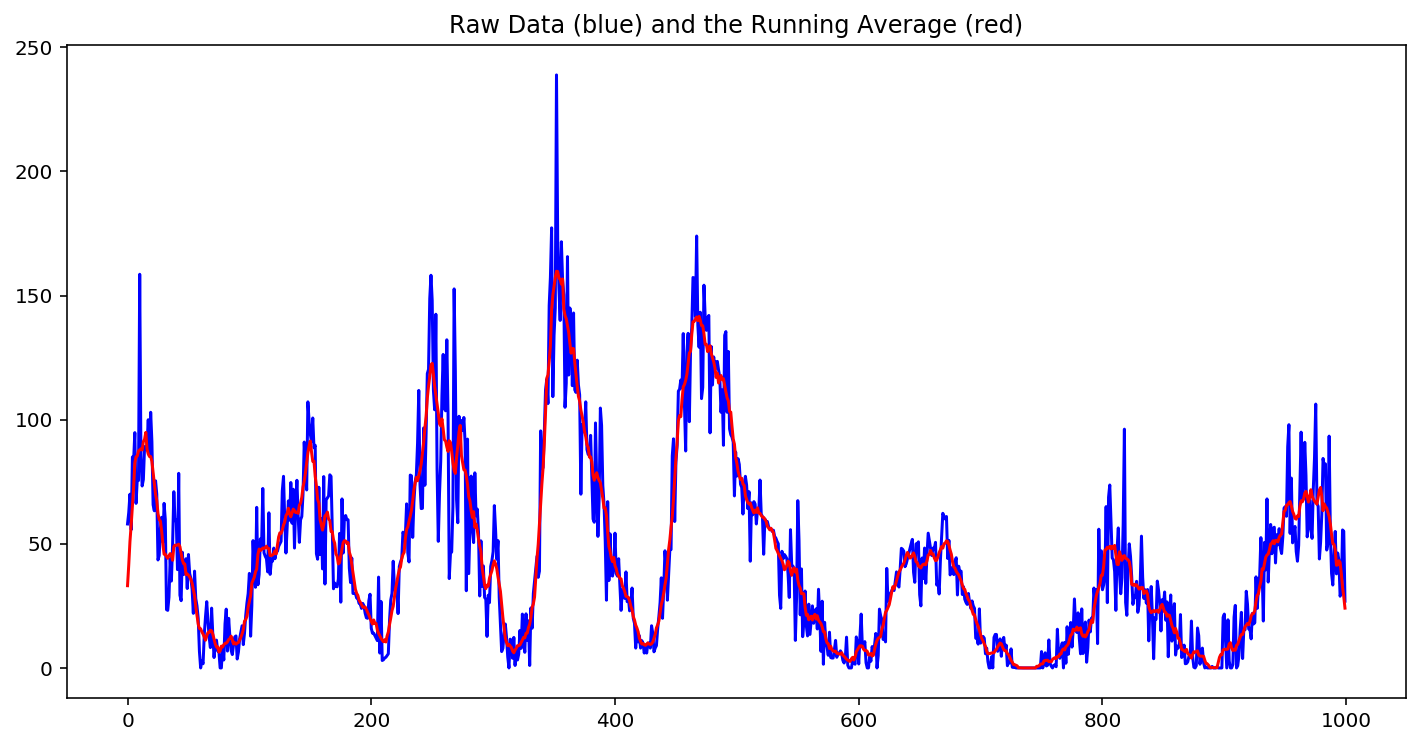

In [5]:
def graph_sunspots(file_name, r):
    '''graphs first 1000 data points and their running average with bandwidth 2r'''
    sunspots = np.loadtxt(file_name, float)

    fig, ax = plt.subplots(1, 1, figsize = (12, 6))
    x = []
    y = []
    for i in range(1000):
        x.append(sunspots[i,0]) 
        y.append(sunspots[i,1])
    
    averages = []
    for k in range(1000):
        sum = 0
        for m in range(-r, r):
            if k + m < 0:
                sum += 0
            elif k + m > len(y)-1:
                sum += 0
            else:
                sum += y[k+m]
        
        averages.append(sum / (2*r))

    #first 1000 months of sunspot data        
    plt.plot(x, y, color='blue')
    
    #first 1000 of running average data
    plt.plot(x, averages, 'k-', color = 'red')
    
    plt.title("Raw Data (blue) and the Running Average (red)")
    plt.show()
    
graph_sunspots("sunspots.txt", 5)

So we can see that once the running average is plotted on the same set of axes, the number of sunspots over time still oscillated but has less extreme swings. The running average creates a smoother dataset for plotting.

# CP 3.2 Curve plotting

Let's take a look at different polar functions graphed on a Cartesian plane. The following functions (deltoid, Galilean spiral, and Fey) have different intervals over which they're evaluated.

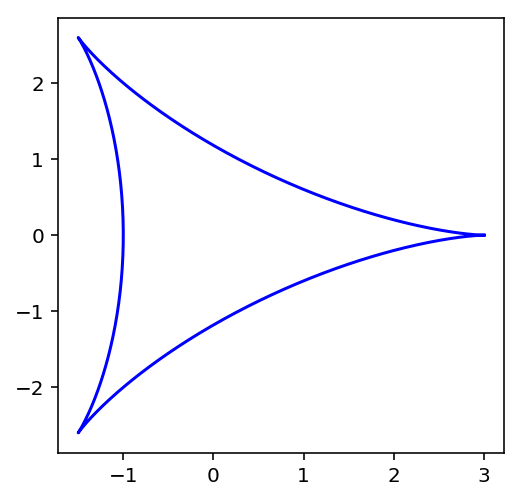

In [6]:
#plots deltoid function as blue line from 0 to 2pi by 0.01

x = []
y = []
for theta in np.arange(0, 2*pi, .01):
    x.append(2 * cos(theta) + cos(2*theta))
    y.append(2 * sin(theta) - sin(2*theta))

fig, ax = plt.subplots(1, 1, figsize = (4, 4))

plt.plot(x, y, 'k-',color='blue')
#plt.xlim(-3.5, 3.5)
#plt.ylim(-3.5, 3.5)
plt.show()

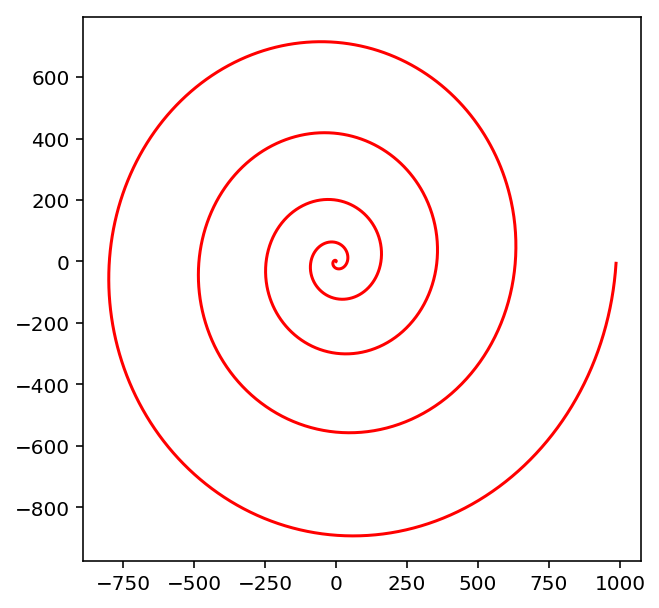

In [7]:
#plots Galilean spiral as red line from 0 to 10pi by 0.01

x = []
y = []
for theta in np.arange(0, 10*pi, .01):
    r = theta**2
    x.append(r * cos(theta))
    y.append(r * sin(theta))

fig, ax = plt.subplots(1, 1, figsize = (5, 5))

plt.plot(x, y, 'k-',color = 'red')
#plt.xlim(-3.5, 3.5)
#plt.ylim(-3.5, 3.5)
plt.show()

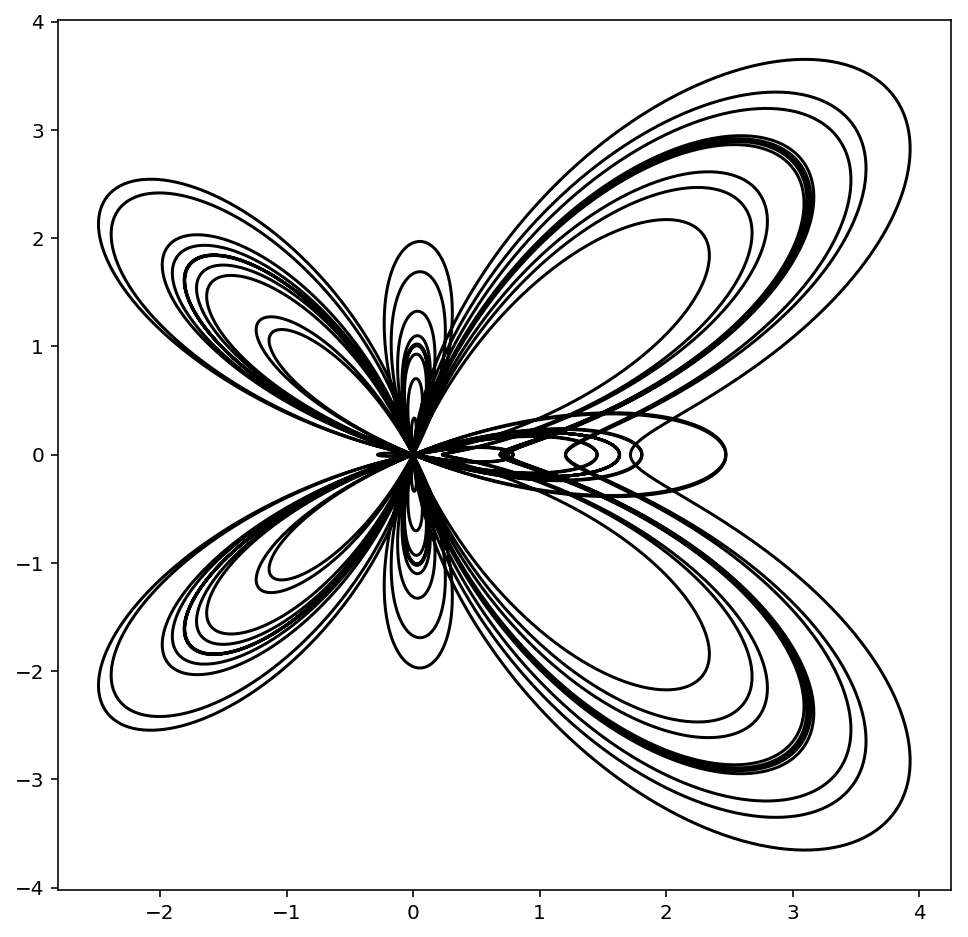

In [8]:
#plots Fey's function from 0 to 24pi by 0.01

x = []
y = []
for theta in np.arange(0, 24*pi, .01):
    r = exp(cos(theta)) - 2 * cos(4*theta) + (sin(theta/12))**5
    x.append(r * cos(theta))
    y.append(r * sin(theta))

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

plt.plot(x, y, 'k-')
plt.show()

Thus, it's clearly very simple to plot parametric polar equations in Cartesian coordinates using matplotlib. All that needs to be done is a conversion from $r$ and $\theta$ $\to$ $x$ and $y$.

# CP 3.8 Least-squares fitting and the photoelectric effect

By minimizing the sum of squares of the residuals (the distances from the fit line to the observed data points), a line of best fit can be drawn that will go through the mean of the data and provide the best linear prediction for its relationship.

Some of the relations necessary for fitting are given by

$E_x = {1\over N} \sum_{i=1}^N x_i,\qquad$    $E_y = {1\over N} \sum_{i=1}^N y_i,\qquad$    $E_{xx} = {1\over N} \sum_{i=1}^N x_i^2,\qquad$  &  $E_{xy} = {1\over N} \sum_{i=1}^N x_iy_i.$

Once we have these expressions, the slope and the intercept of the line can be found with the following:

$m = {E_{xy}-E_x E_y\over E_{xx} - E_x^2},\qquad$    $c = {E_{xx}E_y-E_x E_{xy}\over E_{xx} - E_x^2}$

The relationship between Voltage required to stop a released electron and the frequency of the light releasing it is linear. The slope coefficient calculated from data can be compared to $h \over e$ to experimentally determine a value for Planck's constant.

In [9]:
def photoelectric(filename):
    '''by specifying a filename when calling this function,
        you can graph the raw data from a file.
        It also calculates line of best fit, and
        calculates an experimental value of Planks constant'''
    
    data = np.loadtxt(filename, float) #loads data from drive
    
    fig, ax = plt.subplots(1, 1, figsize = (10, 5)) #initializes plot
    x = data[:,0] #sets x data
    y = data[:,1] #sets y data
    
    ex, ey, exx, exy = 0, 0, 0, 0 #initializes variables used for running sum
    for i in range(np.shape(data)[0]): #this for loop calculates the running sum
        ex += x[i]
        ey += y[i]
        exx += (x[i])**2
        exy += x[i] * y[i]
    
    #divides by the number of elements summed over
    Ex = ex / np.shape(data)[0]
    Ey = ey / np.shape(data)[0]
    Exx = exx / np.shape(data)[0]
    Exy = exy / np.shape(data)[0]
    
    #print(Ex, Ey, Exx, Exy)
    m = (Exy - Ex*Ey) / (Exx - Ex**2)
    c = (Exx*Ey - Ex*Exy) / (Exx - Ex**2)
    print("The best fit line has slope m = {:4.2e} and y intercept c = {:4.2f}."\
          .format(m, c))
    
    #part c, this creates predicted values based on the estimated parameters
    xhat = np.zeros(np.shape(data)[0])
    for i in range(np.shape(xhat)[0]):
        xhat[i] = data[i,0] * m + c
    
    plt.plot(x, y, 'k.')
    plt.plot(x, xhat, 'k-', color='red')
    plt.xlabel("Frequency (v)")
    plt.ylabel("Voltage (V)")
    plt.title("The photoelectric effect")
    plt.show()
    
    h = C.e * m
    error = 100* abs(h - C.h) / C.h
    
    print("The experimental value of Planck's constant is h = {:4.2e}."\
          .format(h))
    
    print("This is {:4.2f}% away from the actual value of 6.626e-34"\
          .format(error))

The best fit line has slope m = 4.09e-15 and y intercept c = -1.73.


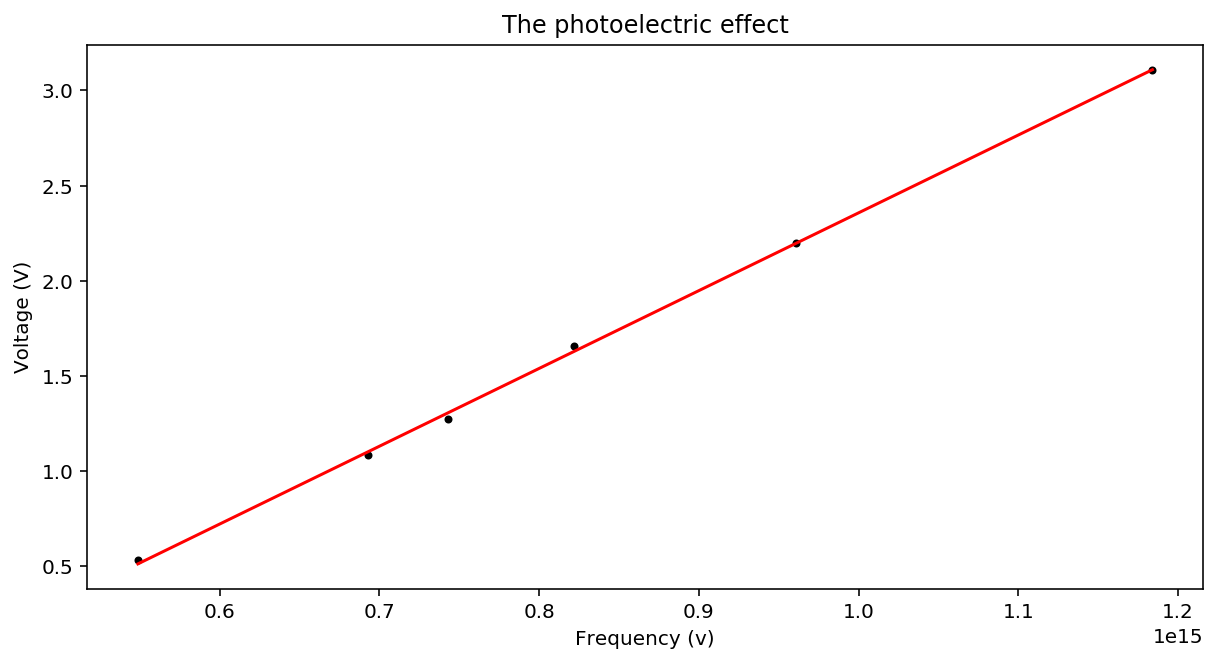

The experimental value of Planck's constant is h = 6.55e-34.
This is 1.15% away from the actual value of 6.626e-34


In [10]:
photoelectric("millikan.txt")

# CP 4.4 Calculating integrals

This problem looks at a rudimentary method of integration for a simple plot of which we know the functional form is

$$y = \sqrt{1-x^2}.$$

By subdividing this region into N partitions and calculating a Riemann sum as N becomes large, an approximation to the integral can be found. It's exact value is $\tfrac12 \pi = 1.57079632679 \ldots$

$$I = \int_{-1}^1 \sqrt{1-x^2} dx \ \sim \ \lim_{N\to\infty} \sum_{k=1}^N hy_k\,, \textrm{ for  } y_k = \sqrt{1 - x_k^2}\qquad\mbox{and}\qquad
x_k = -1 + hk.$$

As stated the value of the integral for $N = 100$ did not fair very well, however it ran in a total of $164 \mu s.$ The best value that can be obtained while still running for under a second is for $N = 10000$

In [11]:
def Riemann_semicircle(N):
    '''takes the number of partitions as an argument'''
    
    h = 2 / N
    
    sum = 0
    for k in range(1, N+1):
        x = -1 + h*k
        y = sqrt(1 - x**2)
        
        sum += h * y
        
    return sum

In [12]:
%%time
print("For 100 partitions, this method of integration results in I = {:4.4f}."\
      .format(Riemann_semicircle(100)))

For 100 partitions, this method of integration results in I = 1.5691.
CPU times: user 391 µs, sys: 457 µs, total: 848 µs
Wall time: 460 µs


In [13]:
%%time
Riemann_semicircle(100000)

#after N = 100000, the value reported is just 1.5708 as you keep increasing it
#further accuracy beyond that isn't obtained

CPU times: user 36.4 ms, sys: 4.08 ms, total: 40.4 ms
Wall time: 41.8 ms


1.5708

# CP 5.1 Velocity integration with the trapezoid rule

The theory behind the trapezoid rule is to approximate the local slope of a function, so that the area of a thin slice can be calculated with precision. The concept behind it is to match the first derivative of the function in question.

The analytial form of the trapezoid rule is

$$I(a,b) = h \ \left( \frac{1}{2}(f(a) + f(b)) + \sum_k^{N-1} f(a+ kh) \right)$$


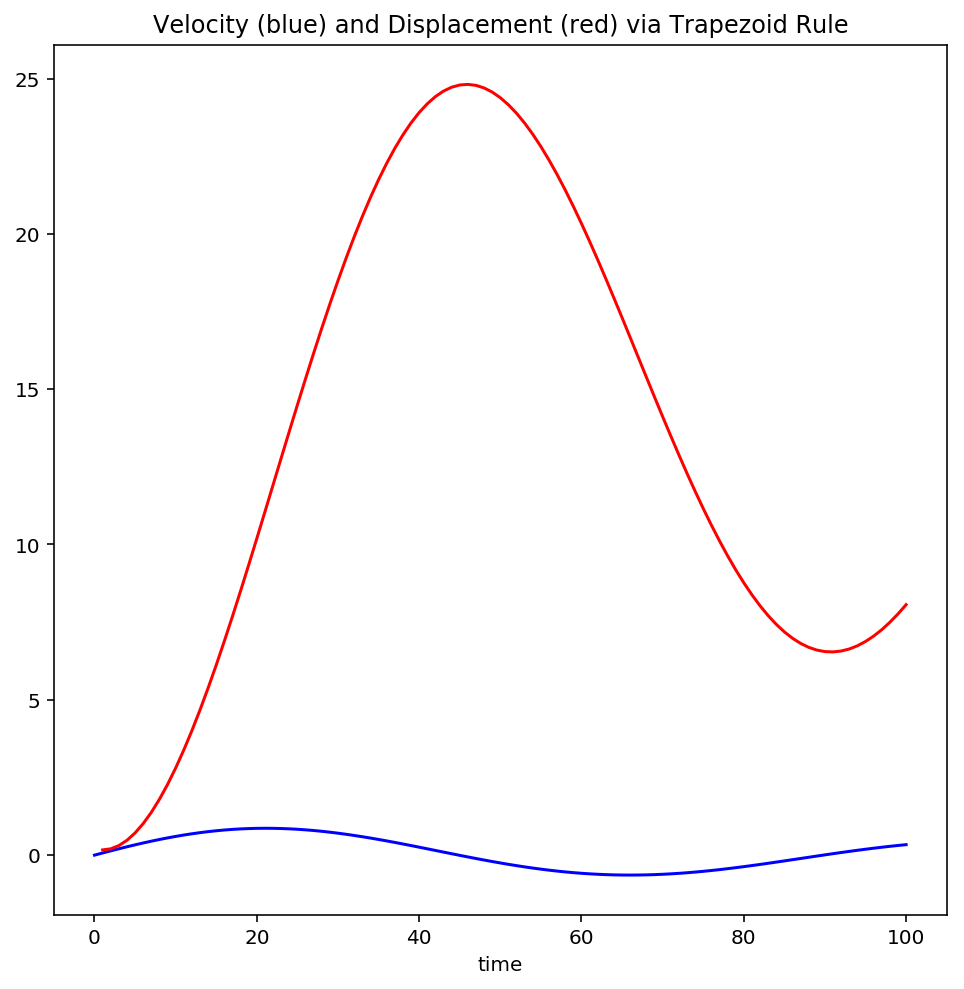

In [14]:
'''This cells defines a function based on the fact that the data
    has a fixed granularity. That is, it uses the existing jumps
    and calculates the area of the trapezoid between each
    observation'''
def trap(filename):
    '''directed to a file of data, this function will 
        integrate the area under the curve mapped out'''

    data = np.loadtxt(filename, float)
    x = data[:,0]
    y = data[:,1]
    
    #width of slices is 1, so area is average of bases
    dist = np.zeros(np.shape(data)[0] - 1)
    run = 0 #the total distance traveled
    for i in range(np.shape(dist)[0]):
        slice_area = 0.5 * (y[i] + y[i-1])
        run += slice_area
        dist[i] = run
    
    fig, ax = plt.subplots(1, 1, figsize = (8, 8)) #initializes plot
    plt.plot(x, y, 'k-', color='blue') #graphs velocity data
    plt.plot(x[1:], dist, 'k-', color='red') #graphs cumulative distance
    
    #plot aesthetics
    plt.title('Velocity (blue) and Displacement (red) via Trapezoid Rule')
    plt.xlabel('time')
    plt.show()

trap("velocities.txt")

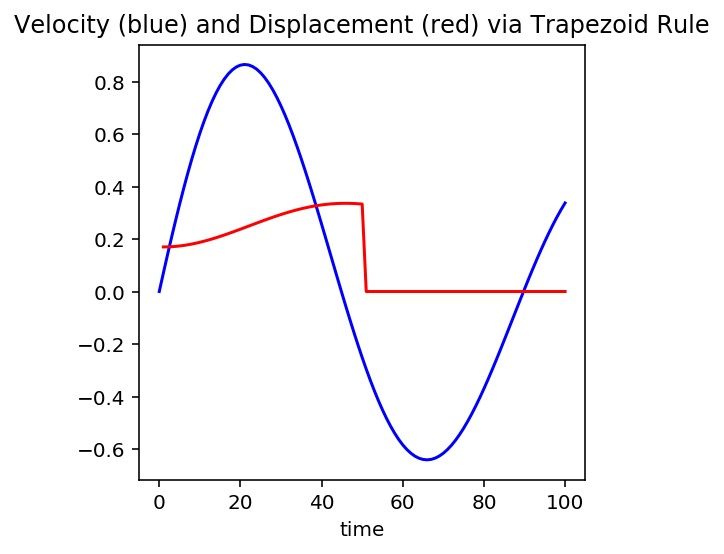

In [15]:
'''This cells defines a function in a more general way,
    in which you can set the number of slices to calculate
    partial areas for. However, because there are only
    100 data data points, you cannot have more slices
    than this.'''
def trap(filename, N):
    '''directed to a file of data, this function will 
        integrate the area under the curve mapped out'''

    data = np.loadtxt(filename, float)
    x = data[:,0]
    y = data[:,1]
    
    a = x[0]
    b = y[-1]
    h = (b-a) / N
    
    #width of slices is 1, so area is average of bases
    dist = np.zeros(np.shape(data)[0] - 1)
    run = 0 #the total distance traveled
    run += 0.5 * y[0]
    run += 0.5 * y[-1]
    for i in range(N):
        slice_area = 0.5 * (y[i] + y[i-1]) * h
        run += slice_area
        dist[i] = run
    
    fig, ax = plt.subplots(1, 1, figsize = (4,4)) #initializes plot
    plt.plot(x, y, 'k-', color='blue') #graphs velocity data
    plt.plot(x[1:], dist, 'k-', color='red') #graphs cumulative distance
    
    #plot aesthetics
    plt.title('Velocity (blue) and Displacement (red) via Trapezoid Rule')
    plt.xlabel('time')
    plt.show()

trap("velocities.txt", 50)

# CP 5.2 Integration with Simpson's rule

This problem looks at evaluating the following integral with Simpson's rule

$$\int_0^2 x^4 -2x+1 \ \textrm{d}x.$$

The correct value of this integral can be found easily because we know the functional form explicitly.

$$\int_0^2 x^4 -2x+1 \ \textrm{d}x = \tfrac15 x^5 - x^2 + x\biggr\rvert_0^2 = 4.4.$$

The simplified form of Simpson's rule is the integral

$$ I = \frac{1}{3} \ h \ \left( f(a) + f(b) + 4 \sum_{k = \textrm{odd}} f(a+kh) + 2 \sum_{k = \textrm{even}} f(a+kh)  \right).$$

In [3]:
def f(x):
    return x**4 - 2*x + 1

def simps(a, b, N):
    """integrates a function using Simpson's Rule
        from a to b with N slices"""
    #%%time
    
    h = (b-a) / N
    
    sum1 = 0
    sum2 = 0
    
    for k in range(N):
        if k % 2 == 1:
            sum1 += f(a + k*h)
        elif k% 2 == 0:
            sum2 += f(a + k*h)
    I = (1/3)*h * (f(a) + f(b) + 4*sum1 + 2*sum2)
    error = 100 * (I - 4.4) / 4.4 #percent error
    
    return I, error

In [7]:
for i in range(4):
    N = 10**(i+1)
    print("For N = {:4}, the integral and fractional error are ({:4.4f}, {:4.3f}%).\n"\
      .format(N, simps(0, 2, N)[0],simps(0, 2, N)[1]))

For N =   10, the integral and fractional error are (4.5338, 3.040%).

For N =  100, the integral and fractional error are (4.4133, 0.303%).

For N = 1000, the integral and fractional error are (4.4013, 0.030%).

For N = 10000, the integral and fractional error are (4.4001, 0.003%).



If only using 10 slices, the fractional error using Simpson's Rule is 3.04%. Adding 10 times more slices each time results in fractional errors almost exactly 10 times less on each iteration. The results are far superior to the trapezoid rule for equivalent amounts of slices. However, these cannot be directly compared because the slice limit for 5.1's use of the trapezoid rule had a floor to the slice width. Because there was a limited number of data points, we could only calculate trapezoid areas for the data we had. However in this problem, we were given a function and were able to slice the plot as finely as we liked.